# Basis Functions

### by Neil Lawrence (2015)

We've seen how we may perform linear regression. Now, we are going to consider how we can perform *non-linear* regression. However, before we get into the details of how to do that we first need to consider in what ways the regression can be non-linear. 

Multivariate linear regression allows us to build models that take many features into account when making our prediction. In this session we are going to introduce *basis functions*. The term seems complicated, but they are actually based on rather a simple idea. If we are doing a multivariate linear regression, we get extra features that *might* help us predict our required response varible (or target value), $y$. But what if we only have one input value? We can actually artificially generate more input values with basis functions.

## Non-linear in the Inputs

When we refer to non-linear regression, we are normally referring to whether the regression is non-linear in the input space, or non-linear in the *covariates*. The covariates are the observations that move with the target (or *response*) variable. In our notation we have been using $\mathbf{x}_i$ to represent a vector of the covariates associated with the $i$th observation. The coresponding response variable is $y_i$. If a model is non-linear in the inputs, it means that there is a non-linear function between the inputs and the response variable. Linear functions are functions that only involve multiplication and addition, in other words they can be represented through *linear algebra*. Linear regression involves assuming that a function takes the form
$$
f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x}
$$
where $\mathbf{w}$ are our regression weights. A very easy way to make the linear regression non-linear is to introduce non-linear functions. When we are introducing non-linear regression these functions are known as *basis functions*.

### Basis Functions

Here's the idea, instead of working directly on the original input space, $\mathbf{x}$, we build models in a new space, $\boldsymbol{\phi}(\mathbf{x})$ where $\boldsymbol{\phi}(\cdot)$ is a *vector valued* function that is defined on the space $\mathbf{x}$. 

Remember, that a vector valued function is just a vector that contains functions instead of values. Here's an example for a one dimensional input space, $x$, being projected to a *quadratic* basis. First we consider each basis function in turn, we can think of the elements of our vector as being indexed so that we have
\begin{align*}
\phi_1(x) = 1, \\
\phi_2(x) = x, \\
\phi_3(x) = x^2.
\end{align*}
Now we can consider them together by placing them in a vector,
$$
\boldsymbol{\phi}(x) = \begin{bmatrix} 1\\ x \\ x^2\end{bmatrix}.
$$
This is the idea of the vector valued function, we have simply collected the different functions together in the same vector making them notationally easier to deal with in our mathematics. 

When we consider the vector valued function for each data point, then we place all the data into a matrix. The result is a matrix valued function,
$$
\boldsymbol{\Phi}(\mathbf{x}) = 
\begin{bmatrix} 1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2\\
\vdots & \vdots & \vdots \\
1 & x_n & x_n^2
\end{bmatrix}
$$
where we are still in the one dimensional input setting so $\mathbf{x}$ here represents a vector of our inputs with $n$ elements. 

Let's try constructing such a matrix for a set of inputs. First of all, we create a function that returns the matrix valued function

In [35]:
import numpy as np # import numpy for the arrays.

def quadratic(x):
    """Take in a vector of input values and return the design matrix associated 
    with the basis functions."""
    return np.hstack([np.ones((n, 1)), x, x**2])

This function takes in an $n\times 1$ dimensional vector and returns an $n\times 3$ dimensional *design matrix* containing the basis functions. We can plot those basis functions against their input as follows.

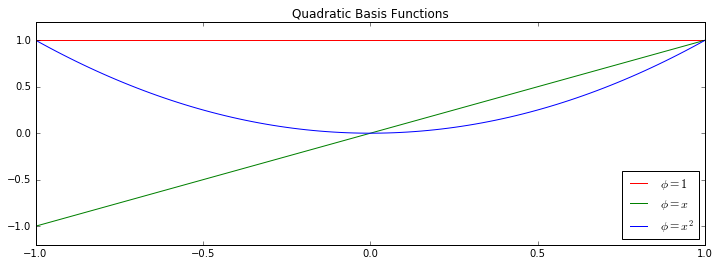

In [36]:
# ensure plots appear in the notebook.
%matplotlib inline 
import pylab as plt

# first let's generate some inputs
n = 100
x = np.zeros((n, 1))  # create a data set of zeros
x[:, 0] = np.linspace(-1, 1, n) # fill it with values between -1 and 1

Phi = quadratic(x)

fig, ax = plt.subplots(figsize=(12,4))
ax.set_ylim([-1.2, 1.2]) # set y limits to ensure basis functions show.
ax.plot(x[:,0], Phi[:, 0], 'r-', label = '$\phi=1$')
ax.plot(x[:,0], Phi[:, 1], 'g-', label = '$\phi = x$')
ax.plot(x[:,0], Phi[:, 2], 'b-', label = '$\phi = x^2$')
ax.legend(loc='lower right')
ax.set_title('Quadratic Basis Functions')

The actual function we observe is then made up of a sum of these functions. This is the reason for the name basis. The term *basis* means 'the underlying support or foundation for an idea, argument, or process', and in this context they form the underlying support for our prediction function. Our prediction function can only be composed of a weighted linear sum of our basis functions. 

### Different Basis

Our choice of basis can be made based on what our beliefs about what is appropriate for the data. For example, the polynomial basis extends the quadratic basis to aribrary degree, so we might define the $j$th basis function associated with the model as
$$
\phi_j(x_i) = x_i^j
$$
which can be implemented as a function in code as follows

In [37]:
def polynomial(x, num_basis=4, data_limits=[-1., 1.]):
    Phi = np.zeros((x.shape[0], num_basis))
    for i in range(num_basis):
        Phi[:, i:i+1] = x**i
    return Phi

To aid in understanding how a basis works, we've provided you with a small interactive tool for exploring this polynomial basis. The tool can be summoned with the following command.

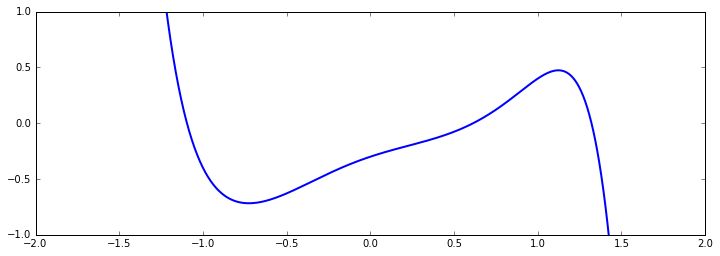

In [38]:
import pods
pods.notebook.display_prediction(basis=polynomial, num_basis=10)

Try moving the sliders around to change the weight of each basis function. Click the control box `display_basis` to show the underlying basis functions (in red). The prediction function is shown in a thick blue line. *Warning* the sliders aren't presented quite in the correct order. `w_0` is associated with the bias, `w_1` is the linear term, `w_2` the quadratic and here (because we have four basis functions) we have `w_3` for the *cubic* term. So the subscript of the weight parameter is always associated with the corresponding polynomial's degree.

### Assignment Question 1

Try increasing the number of basis functions (thereby increasing the *degree* of the resulting polynomial). Describe what you see as you increase number of basis up to 10. Is it easy to change the function in intiutive ways?

*5 marks*

#### Question 1 Answer

As we increase the number of basis functions, we can see that a more flexible curve (prediction function) can be produced, i.e. we can produce very non-linear curves. Specifically when we set number of basis to 3 we can produce a simple non-linear curve. Then by increasing the basis to 4, 5, etc. we can see that more and more flexible curves can be produced and extreme non-linearity can be satisfied as we keep increasing the number of basis functions. Respectively, we can see that the complexity of our model is also increased. 

Generally, it is not easy to change the function in intuitive ways (although we may sometimes make decisions about specific functions and polynomial degrees based on our experience). First of all, the function(s) should be selected based on the data of the corresponding scenarios. Obviously, different scenarios may require linear or non-linear functions. Furthermore, if we talking about non-linear regression, the polynomial degree (if for example we decide to use polynomial basis functions) may be different for each situation.  

We should always be careful when we select the polynomial degree (order) of the functions, since the selection of a high polynomial degree may sometimes cause overfitting (we usually use up to 3 or 4 polynomial degrees). Due to the overfitting, our model may fail to generalise for data that is not in our training set. A very common way to deal with such situations is to use a validation set. The validation set is constructed using parts of our training dataset (if not provided separately). We can therefore use a plot to illustrate the log validation loss against the polynomial order and choose the polynomial degree that produces the lowest (log) validation test that will give us the highest accuracy and hence, the best predictions. Typically, there are many strategies that help you build the most appropriate model such as forward selection procedure and backward elimination. 

## Radial Basis Functions

Another type of basis is sometimes known as a 'radial basis' because the effect basis functions are constructed on 'centres' and the effect of each basis function decreases as the radial distance from each centre increases. 

In [39]:
# %load -s radial mlai.py
def radial(x, num_basis=4, data_limits=[-1., 1.]):
    "Radial basis constructed using exponentiated quadratic form."
    if num_basis>1:
        centres=np.linspace(data_limits[0], data_limits[1], num_basis)
        width = (centres[1]-centres[0])/2.
    else:
        centres = np.asarray([data_limits[0]/2. + data_limits[1]/2.])
        width = (data_limits[1]-data_limits[0])/2.
    
    Phi = np.zeros((x.shape[0], num_basis))
    for i in range(num_basis):
        Phi[:, i:i+1] = np.exp(-0.5*((x-centres[i])/width)**2)
    return Phi

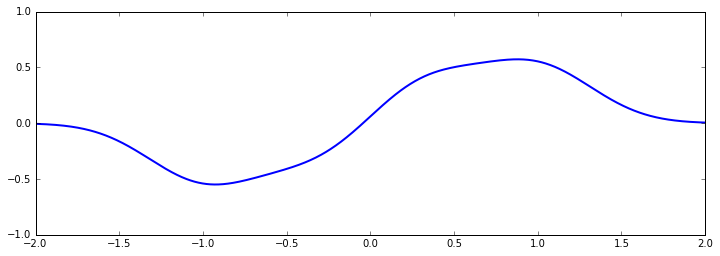

In [40]:
pods.notebook.display_prediction(basis=radial, num_basis=4)

## Fourier Basis

Fourier noticed that any *stationary* function could be converted to a sum of sines and cosines. A Fourier basis is a linear weighted sum of these functions.

In [41]:
# %load -s fourier mlai.py
def fourier(x, num_basis=4, data_limits=[-1., 1.]):
    "Fourier basis"
    tau = 2*np.pi
    span = float(data_limits[1]-data_limits[0])
    Phi = np.zeros((x.shape[0], num_basis))
    for i in range(num_basis):
        count = float((i+1)//2)
        frequency = count/span
        if i % 2:
            Phi[:, i:i+1] = np.sin(tau*frequency*x)
        else:
            Phi[:, i:i+1] = np.cos(tau*frequency*x)
    return Phi

In this code, basis functions with an *odd* index are sine and basis functions with an *even* index are cosine. The first basis function (index 0, so cosine) has a frequency of 0 and then frequencies increase to 1, 2, 3, 4 etc every time a sine and cosine are included.

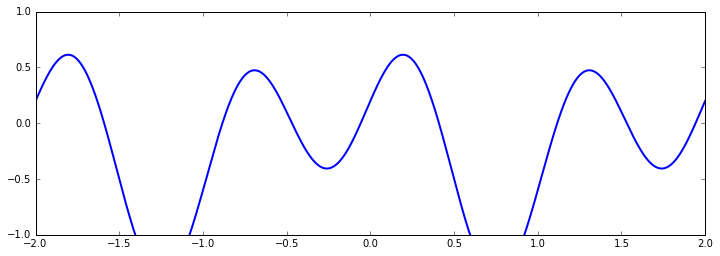

In [42]:
pods.notebook.display_prediction(basis=fourier, num_basis=4)

## Fitting to Data

Now we are going to consider how these basis functions can be adjusted to fit to a particular data set. We will return to the olympic marathon data from last time. First we will scale the output of the data to be zero mean and variance 1.

In [43]:
data = pods.datasets.olympic_marathon_men()
y = data['Y']
x = data['X']
y -= y.mean()
y /= y.std()

### Assignment Question 2

Now we are going to redefine our polynomial basis. Have a careful look at the operations we perform on `x` to create `z`. We use `z` in the polynomial computation. What are we doing to the inputs? Why do you think we are changing `x` in this manner?

*5 marks*

#### Question 2 Answer

In this particular fragment of code, we calculate the centre of our data distribution and we subtract it from the given input data. Then we multiply the new value by 2 and then divide it by the value of span. In the given fragment of code, using these particular data limits [-1, 1] we obtain $\mathit{z} = \mathit{x}$.
$\mathit{z}$ was introduced because data limits may not always be from -1 to 1. 

This technique lies in the phase of data (re)scaling (usually performed using standarisation and normalisation). 
In data standarisation, we may need to subtract the mean from each feature and then divide it by the standard deviation (as illustrated in the previous fragment of code), in oredr to obtain a random variable with mean = 0 and standard\_deviation = 1. In data normalisation we may use the range (span) and centres of our data set in order to obtain a set with elements that lie within some values (e.g. from 0 to 1).


The reason why we normalise and standarise our data is the wide range of the raw data. If the data is not normalised (and standarised / scaled) then the objective functions will not work properly. When normalising the data we let the features to equally contribute. Another reason why we use normalisation is the efficiency of the models. For instance, gradient descent converges faster when the data is scaled. It is also important to note that data scaling has different effect on different algorithms. Furthermore it worth mentioning that when we apply data normalisation to our dataset, the outliers are lost. The application of such techniques is always dependent on our dataset and on our algorithm (i.e. data rescaling is not always recommended). 

$\textbf{Working example}$ using other data\_limits in order to illustrate the technique:

Let data\_limits = [-2, 5]. 

Given a data input $\mathit{x} = 5$ we have:
$\mathit{centre}$ = 1.5 and $\mathit{span}$ = 7

$\mathit{z}$ = 3 - 1.5

$\mathit{z}$ = 2 * (1.5) / 7

$\mathit{z}$ = 0.43

In practice, the input data has been rescaled-normalised. 

In [44]:
# %load -s polynomial mlai.py
def polynomial(x, num_basis=4, data_limits=[-1., 1.]):
    "Polynomial basis"
    centre = data_limits[0]/2. + data_limits[1]/2.
    span = data_limits[1] - data_limits[0]
    z = x - centre
    z = 2*z/span
    Phi = np.zeros((x.shape[0], num_basis))
    for i in range(num_basis):
        Phi[:, i:i+1] = z**i
        
    return Phi

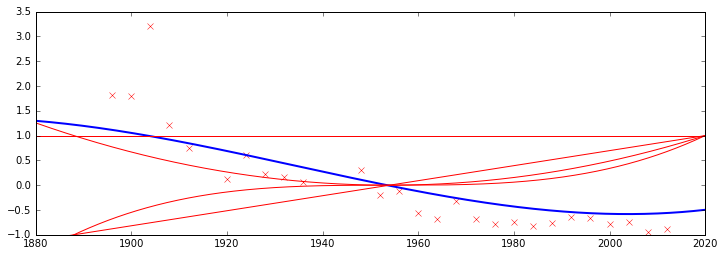

In [87]:
#x[:, 0] = np.linspace(1888, 2020, 1000)
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(x, y, 'rx')
pods.notebook.display_prediction(basis=dict(radial=radial, polynomial=polynomial, fourier=fourier), 
                                 data_limits=(1888, 2020),
                                 fig=fig, ax=ax,
                                 offset=0.,
                                 wlim = (-4., 4., 0.001),
                                 num_basis=4)

### Assignment Question 3

Use the tool provided above to try and find the best fit you can to the data. Explore the parameter space and give the weight values you used for the 

(a) polynomial basis
(b) RBF basis
(c) Fourier basis

Write your answers in the code box below creating a new vector of parameters (in the correct order!) for each basis.

*7.5 marks*

In [3]:
# Question 3 Answer Code
# provide the answers so that the code runs correctly otherwise you will loose marks!

# (a) polynomial
###### Edit these lines #####
w_0 = - 0.603
w_1 = - 0.61
w_2 = 1.141
w_3 = - 0.923
##############################
w_polynomial = np.asarray([[w_0], [w_1], [w_2], [w_3]]) 

# (b) rbf
###### Edit these lines #####
w_0 = 1.815
w_1 = 0.077
w_2 = -0.628
w_3 = -0.711
##############################
w_rbf = np.asarray([[w_0], [w_1], [w_2], [w_3]]) 

# (c) fourier
###### Edit these lines #####
w_0 = 0.283
w_1 = 0.404
w_2 = -0.839
w_3 = -0.545
##############################
w_fourier = np.asarray([[w_0], [w_1], [w_2], [w_3]]) 

In [14]:
np.asarray([[1, 2, 3, 4]]).shape

(1, 4)

We like to make use of *design* matrices for our data. Design matrices, as you will recall, involve placing the data points into rows of the matrix and data features into the columns of the matrix. By convention, we are referincing a vector with a bold lower case letter, and a matrix with a bold upper case letter. The design matrix is therefore given by
$$
\boldsymbol{\Phi} = \begin{bmatrix} 1 & \mathbf{x} & \mathbf{x}^2\end{bmatrix}
$$


### Non-linear but Linear in the Parameters

One rather nice aspect of our model is that whilst it is non-linear in the inputs, it is still linear in the parameters $\mathbf{w}$. This means that our derivations from before continue to operate to allow us to work with this model. In fact, although this is a non-linear regression it is still known as a *linear model* because it is linear in the parameters, 
$$
f(\mathbf{x}) = \mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x})
$$
where the vector $\mathbf{x}$ appears inside the basis functions, making our result, $f(\mathbf{x})$ non-linear in the inputs, but $\mathbf{w}$ appears outside our basis function, making our result *linear* in the parameters. In practice, our basis function itself may contain its own set of parameters,
$$
f(\mathbf{x}) = \mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}; \boldsymbol{\theta}),
$$
that we've denoted here as $\boldsymbol{\theta}$. If these parameters appear inside the basis function then our model is *non-linear* in these parameters.

### Assignment Question 4
For the following prediction functions state whether the model is linear in the inputs, the parameters or both.

(a) $f(x) = w_1x_1 + w_2$

(b) $f(x) = w_1\exp(x_1) + w_2x_2 + w_3$

(c) $f(x) = \log(x_1^{w_1}) + w_2x_2^2 + w_3$

(d) $f(x) = \exp(-\sum_i(x_i - w_i)^2)$

(e) $f(x) = \exp(-\mathbf{w}^\top \mathbf{x})$

*12.5 marks*

#### Question 4 Answer

(a) The model is linear in both, the inputs and the parameters.

(b) The model is linear in the parameters (w) but non-linear in the inputs (exponential of input $x_1$)

(c) The model is linear in the parameters (w) but non linerar in the inputs. 

(d) The model is non-linear in both, the inputs and the parameters.

(e) The model is non-linear in both, the inputs and the parameters.

## Fitting the Model Yourself

You now have everything you need to fit a non-linear (in the inputs) basis function model to the marathon data. 

### Assignment Question 5

Choose one of the basis functions you have explored above. Compute the design matrix on the covariates (or input data), `x`. Use the design matrix and the response variable `y` to solve the following linear system for the model parameters `w`.
$$
\boldsymbol{\Phi}^\top\boldsymbol{\Phi}\mathbf{w} = \boldsymbol{\Phi}^\top \mathbf{y}
$$
Compute the corresponding error on the training data. How does it compare to the error you were able to achieve fitting the basis above? Plot the form of your prediction function from the least squares estimate alongside the form of you prediction function you fitted by hand.

*20 marks*

Error: 3.7897709139
Error (hand drawn prediction: 5.4198572368


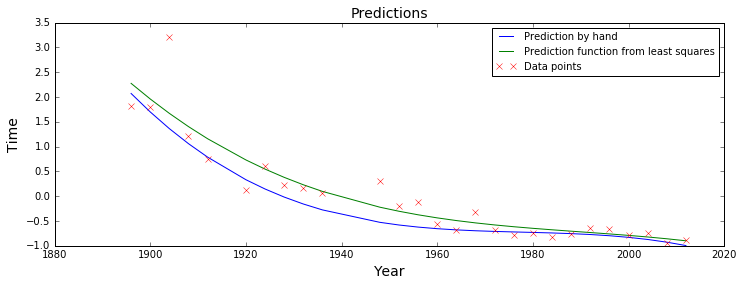

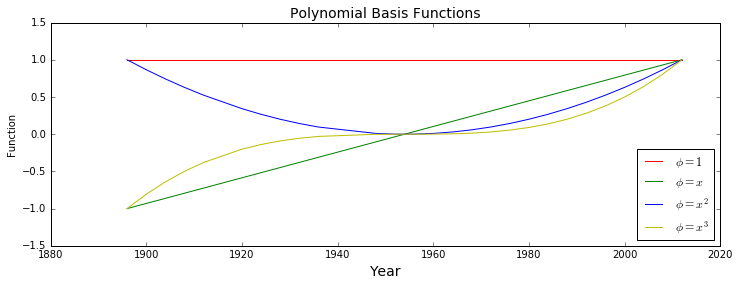

In [34]:
# Question 5 Answer Code
# Write code for you answer to this question in this box
# Do not delete these comments, otherwise you will get zero for this answer.
# Make sure your code has run and the answer is correct *before* submitting your notebook for marking.
import pods
import numpy as np
import scipy as sp
import pylab as plt
import pandas as pd
from IPython.display import display

# Polynomial basis function 
def polynomial(x, num_basis=4, data_limits=[-1., 1.]):
    "Polynomial basis"
    centre = data_limits[0]/2. + data_limits[1]/2.
    span = data_limits[1] - data_limits[0]
    z = x - centre
    z = 2*z/span
    Phi = np.zeros((x.shape[0], num_basis))
    for i in range(num_basis):
        Phi[:, i:i+1] = z**i
        
    return Phi

# Data
data = pods.datasets.olympic_marathon_men()
y = data['Y']
x = data['X']

# Data standarisation
y -= y.mean()
y /= y.std()

max_basis = 4

# Initialise vectors and matrices
sum_squares = np.array([np.nan]*(max_basis))
w_star = np.zeros(nb)


# Make calculations for polyomial basis functions of 1..4 order. 
for nb in range(1, max_basis + 1):    
    # Design matrix.
    PHI = polynomial(x, num_basis = nb, data_limits=[min(x), max(x)])
    
    # QR decomposition.
    Q, R = np.linalg.qr(PHI)
    w_star = sp.linalg.solve_triangular(R, np.dot(Q.T, y))

    # Calculate the dot product         
    f = np.dot(PHI, w_star)
    
    # Sum squares.
    sum_squares[nb - 1] = ((y-f)**2).sum()
    
    
# by hand
phi_by_hand = polynomial(x, data_limits=[min(x), max(x)])
f_by_hand = np.dot(phi_by_hand, w_polynomial)
ss_hand = ((y-f_by_hand)**2).sum()

# Report objective errors. 
print("Error:", sum_squares[3])
print("Error (hand drawn prediction:", ss_hand)


# Plots
%matplotlib inline 
fig, ax = plt.subplots(figsize=(12,4))

# Predictions
ax.plot(x, f_by_hand, label="Prediction by hand")
ax.plot(x, f, "g", label="Prediction function from least squares")
ax.plot(x, y, "rx", label="Data points")

plt.title("Predictions", fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Time', fontsize=14)
plt.legend(loc='upper right', fontsize=10)

# Polynomial basis functions
fig2, ax2 = plt.subplots(figsize=(12,4))
ax2.plot(x[:,0], PHI[:, 0], 'r-', label = '$\phi=1$')
ax2.plot(x[:,0], PHI[:, 1], 'g-', label = '$\phi = x$')
ax2.plot(x[:,0], PHI[:, 2], 'b-', label = '$\phi = x^2$')
ax2.plot(x[:,0], PHI[:, 3], 'y-', label = '$\phi = x^3$')
    
ax2.set_ylim(-1.5, 1.5)
plt.title("Polynomial Basis Functions", fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Function')
plt.legend(loc="lower right")


## Lecture on Basis Functions from GPRS Uganda

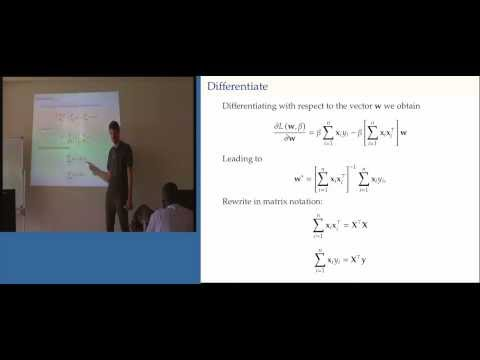

In [33]:
from IPython.display import YouTubeVideo
YouTubeVideo('PoNbOnUnOao')